In [1]:
import pandas as pd

# Load the CSV files
file_1_path = '/Users/yuxitian/Desktop/Datathon 03:2024/Dataset/file_3_Mar18_Output_1.csv'
file_2_path = '/Users/yuxitian/Desktop/Datathon 03:2024/Dataset/file_4_Mar18_Output_1.csv'

df1 = pd.read_csv(file_1_path)
df2 = pd.read_csv(file_2_path)

# Display the first few rows of each DataFrame
df1.head(), df2.head()


/Users/yuxitian/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(      timestamp_call_key retailer_code       serial reason  \
 0  240315173250 DAL1OA3M             D  10010009499     PP   
 1  240315124742 DAL15XHK             E  10006021998     BA   
 2  240317114237 DAL3BLK6             J  10016007830     PT   
 3  240314120849 PHX6PL4U             E  10008003199     BA   
 4  240314145902 DAL68RYS             I  10013002037     BA   
 
                     mos  resolved  no_of_accounts_with_syf_13_march  \
 0              IA PP TR  resolved                               1.0   
 1        IA BA TS nl TR     floor                               2.0   
 2  IA AA BA MR nl PT TR  resolved                              12.0   
 3                 IA BA  resolved                               2.0   
 4     IA BA TS nl mm TR     floor                               6.0   
 
    account_balance_13_march delinquency_history_13_march  \
 0                       NaN                         [00]   
 1                    143.28                         [00]   
 2 

# Combined two dataset into one dataset 

In [8]:
# Concatenate the two DataFrames vertically
combined_dataset = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_path = '/Users/yuxitian/Desktop/Datathon 03:2024/Dataset/combined_dataset.csv'
combined_df.to_csv(combined_csv_path, index=False)

# Return the path to the new combined CSV file
combined_csv_path



'/Users/yuxitian/Desktop/Datathon 03:2024/Dataset/combined_dataset.csv'

In [3]:
df3 = pd.read_csv(combined_csv_path)

# Resloved or Floor

In [ ]:
# true_resloved 
def map_value(val):
    if val == 'floor':
        return 0
    else:
        return 1

# Create new column based on conditions
combined_dataset['true_resolved'] = combined_dataset['resolved'].apply(map_value)


# Status without BIZ and P4 T1 D3

In [ ]:
values_to_exclude = ['B', 'I', 'Z']

c2_dataset = combined_dataset[~combined_dataset['account_status_13_march'].isin(values_to_exclude)]
    

values_to_exclude2 = ['P4', 'TI', 'D3']
c3_dataset = c2_dataset[~c2_dataset['mos'].isin(values_to_exclude2)]



# Last stap for prediction

In [ ]:
def get_last_service(s):

    services = [service for service in s.split(' ') if service != 'TR' and service != 'nl' and service != 'ss' and service != 'm-' and service != 'me' and service != 'mm' and service != 'mn' and service != 'mo' and service != "mp" and service != "mt" and service != 'LW' and service != 'NU' and service != 'PX' and service != 'DE' and service != 'iS' and service != 'SP' and service != 'TP' and service and service != 'mP' and service != 'eY' and service != 'iP' and service != 'MP' and service != 'PA' and service != 'PC' and service != 'PS' and service != 'RI' and service != 'VP' and service != 'AT']
    return services[-1] if services else None

# Apply the function to the column and store the result in a new column 'Last service'
c3_dataset['Last service'] = combined_dataset['mos'].apply(get_last_service)

c3_resolved = c3_dataset[c3_dataset['true_resolved'] == 1]
c3_floor = c3_dataset[c3_dataset['true_resolved'] == 0]


c3_resolved

# Run this!!!!

In [9]:
# true_resloved 
def map_value(val):
    if val == 'floor':
        return 0
    else:
        return 1

# Create new column based on conditions
combined_dataset['true_resolved'] = combined_dataset['resolved'].apply(map_value)

values_to_exclude = ['B', 'I', 'Z']

c2_dataset = combined_dataset[~combined_dataset['account_status_13_march'].isin(values_to_exclude)]
    

values_to_exclude2 = ['P4', 'TI', 'D3']
c3_dataset = c2_dataset[~c2_dataset['mos'].isin(values_to_exclude2)]

def get_last_service(s):

    services = [service for service in s.split(' ') if service != 'TR' and service != 'nl' and service != 'ss' and service != 'm-' and service != 'me' and service != 'mm' and service != 'mn' and service != 'mo' and service != "mp" and service != "mt" and service != 'LW' and service != 'NU' and service != 'PX' and service != 'DE' and service != 'iS' and service != 'SP' and service != 'TP' and service and service != 'mP' and service != 'eY' and service != 'iP' and service != 'MP' and service != 'PA' and service != 'PC' and service != 'PS' and service != 'RI' and service != 'VP' and service != 'AT'and service != 'BA'and service != 'Mr'and service != 'MR'and service != 'AT'and service != 'TS'and service != 'IA']
    return services[-1] if services else None

# Apply the function to the column and store the result in a new column 'Last service'
c3_dataset['Last service'] = combined_dataset['mos'].apply(get_last_service)

c3_resolved = c3_dataset[c3_dataset['true_resolved'] == 1]
c3_floor = c3_dataset[c3_dataset['true_resolved'] == 0]

c3_dataset

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,true_resolved,Last service
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,NaN,[00],5/19/2013,NaN,0,1,E,0,1,PP
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,143.28,[00],9/22/2003,NaN,0,1,E,0,0,None
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0.00,[00],9/4/2017,NaN,8,0,,0,1,PT
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,-6.32,[00],2/7/2024,NaN,0,0,L,0,1,None
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,7.00,[00],1/2/2022,NaN,0,1,,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,TA
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,None
1798795,240316190932 PHX2S13U,a,20001160188,PP,IA PP TR,resolved,7.0,35.66,[00],8/24/2023,...,35.66,[00],8/24/2023,NaN,0,0,,0,1,PP
1798796,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,386.63,[00],5/15/2019,...,386.63,[00],5/15/2019,A,0,1,L,0,0,None


In [10]:
c3_resolved

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,true_resolved,Last service
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,NaN,[00],5/19/2013,NaN,0,1,E,0,1,PP
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0.00,[00],9/4/2017,NaN,8,0,,0,1,PT
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,-6.32,[00],2/7/2024,NaN,0,0,L,0,1,None
6,240316012428 PHX43JOI,E,10006032399,BA,IA BA,resolved,3.0,NaN,[02],9/26/2021,...,NaN,[02],9/26/2021,NaN,0,0,L,0,1,None
7,240316171347 PHX4I164,B,10002094529,BA,IA BA,resolved,6.0,0.00,[00],9/13/2020,...,0.00,[00],9/13/2020,NaN,0,0,,0,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798790,240314191841 DAL27M1P,i,20012004106,PP,IA PP TR,resolved,4.0,1591.73,[00],9/19/2021,...,1591.73,[00],9/19/2021,NaN,0,0,,0,1,PP
1798791,240314075300 PHX5SRLR,b,20002002187,PP,mn IA PP TR,resolved,9.0,680.86,[00],12/19/2023,...,680.86,[00],12/19/2023,NaN,0,0,NaN,0,1,PP
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,TA
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,1,None


In [11]:
c3_floor

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,true_resolved,Last service
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,143.28,[00],9/22/2003,NaN,0,1,E,0,0,None
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,7.00,[00],1/2/2022,NaN,0,1,,0,0,None
5,240314151323 PHX4I30S,I,10013002037,PS,IA BA TS nl PS nl mt RS TR,floor,6.0,7.00,[00],1/2/2022,...,7.00,[00],1/2/2022,NaN,0,1,,0,0,RS
10,240317234904 DAL5X9Y0,B,10007034394,eL,IA BA TS nl eL TR,floor,2.0,NaN,[00],3/3/2024,...,NaN,[00],3/3/2024,NaN,0,0,,0,0,eL
17,240314081235 DAL1ROPP,I,10013000316,BA,IA AA BA MR nl TR,floor,2.0,8.37,[00],2/5/2024,...,0.00,[00],2/5/2024,F,7,0,,0,0,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798781,240315115341 PHX67YL0,e,20005020396,RC,IA PI BA MR nl RC HI TR,floor,4.0,909.39,[00],5/17/2019,...,909.39,[00],5/17/2019,NaN,,0,,0,0,HI
1798785,240314120335 DAL3W50J,a,20001017373,Pd,IA PP BA Pd TR,floor,12.0,3003.14,[00],11/21/2022,...,3003.14,[00],11/21/2022,NaN,0,0,E,0,0,Pd
1798792,240314080117 DAL3CVDQ,b,20002002187,BA,mn IA PP BA MR nl WA nl BA nl mt,floor,9.0,680.86,[00],12/19/2023,...,680.86,[00],12/19/2023,NaN,0,0,NaN,0,0,WA
1798796,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,386.63,[00],5/15/2019,...,386.63,[00],5/15/2019,A,0,1,L,0,0,None


# Total in pie chart

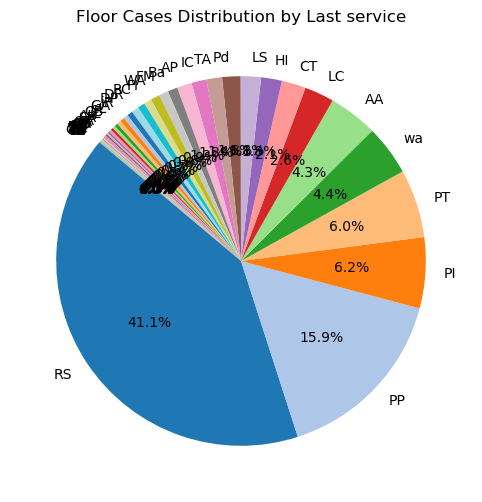

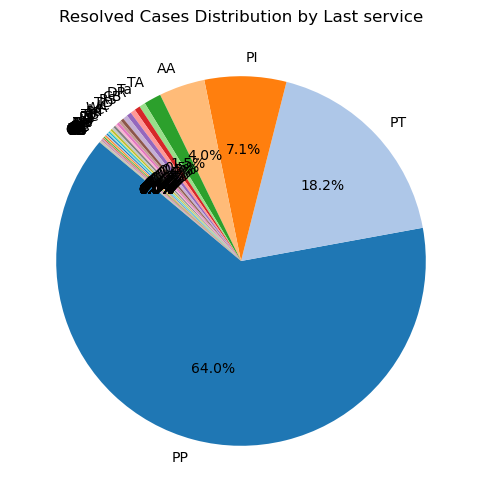

In [12]:
import matplotlib.pyplot as plt

# Function to create a pie chart for the given dataset and title
def create_pie_chart(c3_dataset, title):
    # Count the occurrences of unique values in the 'mos' column
    mos_counts = c3_dataset['Last service'].value_counts()
    # Set up the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.show()

# Create the pie chart for c3_floor dataset
create_pie_chart(c3_floor, 'Floor Cases Distribution by Last service')

# Create the pie chart for c3_resolved dataset
create_pie_chart(c3_resolved, 'Resolved Cases Distribution by Last service')


# Top 10 in pie chart

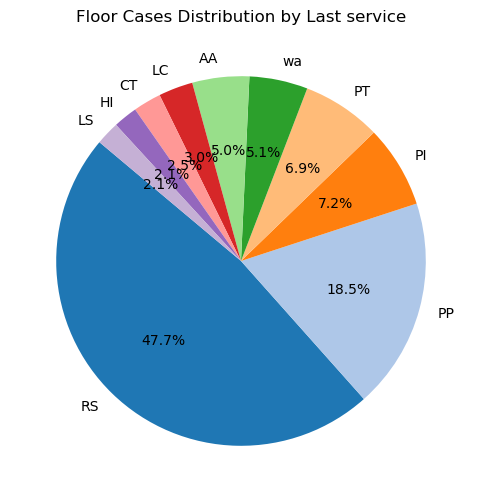

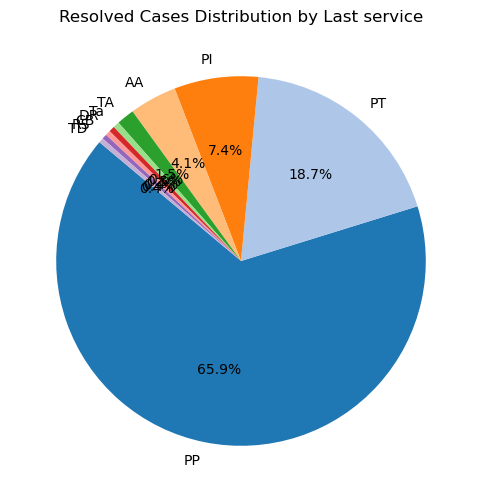

In [13]:
import matplotlib.pyplot as plt

# Function to create a pie chart for the given dataset and title
def create_pie_chart(c3_dataset, title):
    # Count the occurrences of unique values in the 'Last service' column and keep the top 10
    mos_counts = c3_dataset['Last service'].value_counts().head(10)
    # Set up the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.show()

# Create the pie chart for the c3_floor dataset, showing only the top 10 'Last service' occurrences
create_pie_chart(c3_floor, 'Floor Cases Distribution by Last service')

# Create the pie chart for the c3_resolved dataset, showing only the top 10 'Last service' occurrences
create_pie_chart(c3_resolved, 'Resolved Cases Distribution by Last service')




# Top 5 and others showing in pie chart

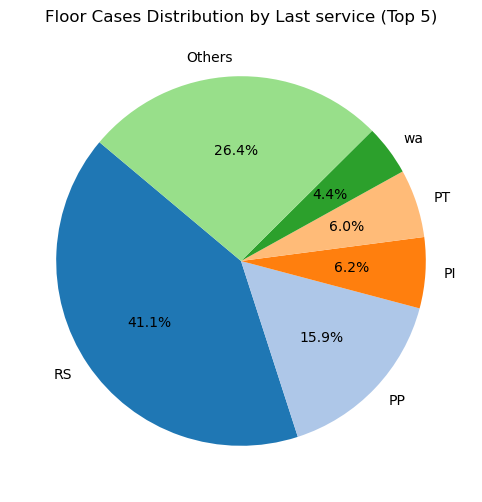

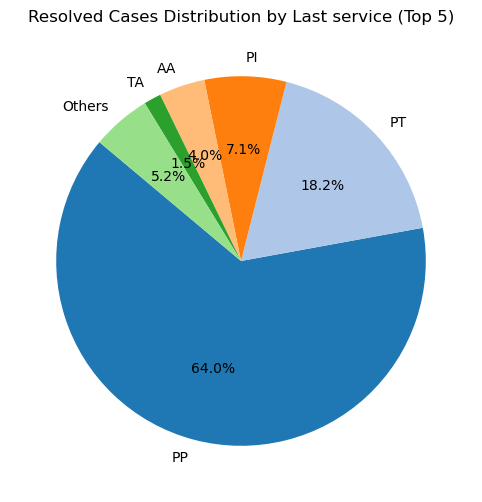

In [14]:
import matplotlib.pyplot as plt

# Function to create a pie chart for the given dataset and title, showing only top 10 occurrences
def create_pie_chart(c3_dataset, title):
    # Count the occurrences of unique values in the 'Last service' column and get top 10
    mos_counts = c3_dataset['Last service'].value_counts().head(5)
    # Add an 'Others' category if there are more than 10 unique values
    if len(c3_dataset['Last service'].value_counts()) > 5:
        others_count = c3_dataset['Last service'].value_counts()[5:].sum()
        mos_counts['Others'] = others_count
    # Set up the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.show()

# Create the pie chart for the c3_floor dataset, showing only the top 10 'Last service' values
create_pie_chart(c3_floor, 'Floor Cases Distribution by Last service (Top 5)')

# Create the pie chart for the c3_resolved dataset, showing only the top 10 'Last service' values
create_pie_chart(c3_resolved, 'Resolved Cases Distribution by Last service (Top 5)')


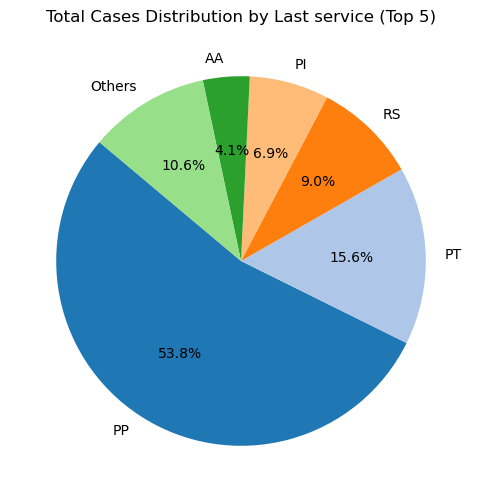

In [15]:
import matplotlib.pyplot as plt

# Function to create a pie chart for the given dataset and title, showing only top 10 occurrences
def create_pie_chart(c3_dataset, title):
    # Count the occurrences of unique values in the 'Last service' column and get top 10
    mos_counts = c3_dataset['Last service'].value_counts().head(5)
    # Add an 'Others' category if there are more than 10 unique values
    if len(c3_dataset['Last service'].value_counts()) > 5:
        others_count = c3_dataset['Last service'].value_counts()[5:].sum()
        mos_counts['Others'] = others_count
    # Set up the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(mos_counts, labels=mos_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.show()

    
# Create the pie chart for the c3_floor dataset, showing only the top 10 'Last service' values
create_pie_chart(c3_dataset, 'Total Cases Distribution by Last service (Top 5)')


# Create a list

In [16]:
# Apply 'get_last_service' to 'mos' column and create 'Last service' column
c3_dataset['Last service'] = c3_dataset['mos'].apply(get_last_service)

# Calculate the occurrences of each service in 'Last service' column in descending order
service_occurrences = c3_dataset['Last service'].value_counts().to_dict()

service_occurrences
c3_dataset['Last service']



0            PP
1          None
2            PT
3          None
4          None
           ... 
1798793      TA
1798794    None
1798795      PP
1798796    None
1798797      LS
Name: Last service, Length: 1794758, dtype: object

In [17]:
c3_dataset['Last service'].value_counts().shape

(53,)

# Table for occurance frequency for each MOS

In [19]:
def get_last_service(s):
    services = [service for service in s.split(' ') if service not in {'TR', 'nl', 'ss', 'm-', 'me', 'mm', 'mn', 'mo', "mp", "mt", 'LW', 'NU', 'PX', 'DE', 'iS', 'SP', 'TP', 'mP', 'eY', 'iP', 'MP', 'PA', 'PC', 'PS', 'RI', 'VP', 'AT', 'BA', 'Mr', 'MR', 'AT', 'TS', 'IA'}]
    return services[-1] if services else None

c3_dataset['Last service'] = c3_dataset['mos'].apply(get_last_service)

# Calculate frequency and percentage
service_counts = c3_dataset['Last service'].value_counts()
service_df = service_counts.reset_index()
service_df.columns = ['Last service', 'Frequency']
service_df['Percentage'] = (service_df['Frequency'] / service_df['Frequency'].sum()) * 100

service_df

,Last service,Frequency,Percentage
0,PP,766278,53.790881
1,PT,221920,15.578253
2,RS,128719,9.035766
3,PI,98978,6.948019
4,AA,58091,4.077849
5,TA,20998,1.474009
6,wa,14562,1.022218
7,LC,10388,0.729213
8,DR,7437,0.522060
9,Pd,7120,0.499807


# Difference for PT

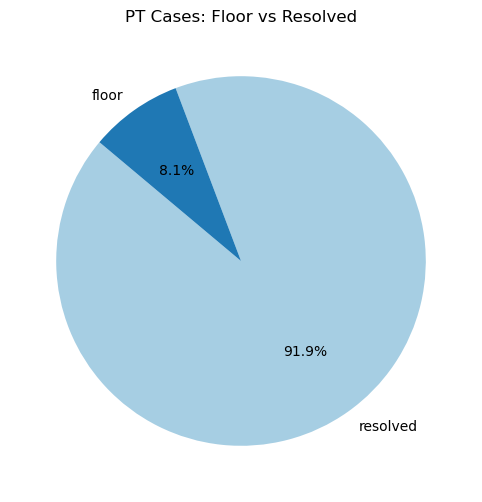

In [60]:
def create_resolved_pie_chart_for_pt(dataset):
    # Filter for 'PT' category
    pt_dataset = c3_dataset[c3_dataset['Last service'] == 'PT']
    
    # Assuming 'resolved' column indicates whether a case is 'floor' or 'resolved'
    resolved_counts = pt_dataset['resolved'].value_counts()
    
    # Generate pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(resolved_counts, labels=resolved_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('PT Cases: Floor vs Resolved')
    plt.show()

create_resolved_pie_chart_for_pt(c3_dataset)


# Difference for PI

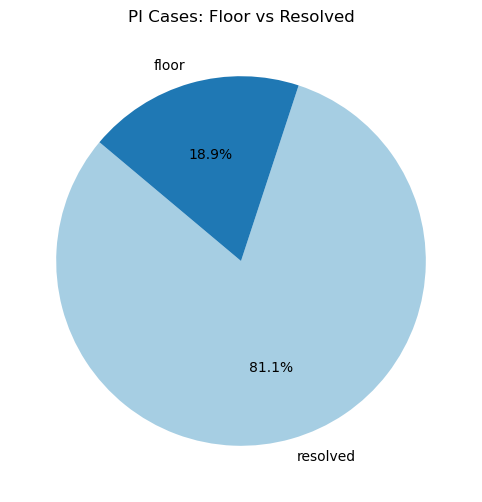

In [54]:
def create_resolved_pie_chart_for_pi(dataset):
    # Filter for 'PI' category
    pi_dataset = c3_dataset[c3_dataset['Last service'] == 'PI']
    
    # Assuming 'resolved' column indicates whether a case is 'floor' or 'resolved'
    resolved_counts = pi_dataset['resolved'].value_counts()
    
    # Generate pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(resolved_counts, labels=resolved_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('PI Cases: Floor vs Resolved')
    plt.show()


create_resolved_pie_chart_for_pi(c3_dataset)

# Difference for PP

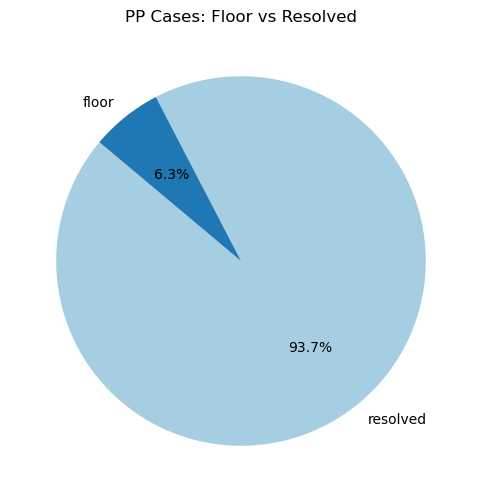

In [61]:
def create_resolved_pie_chart_for_pp(dataset):
    # Filter for 'PP' category
    pp_dataset = c3_dataset[c3_dataset['Last service'] == 'PP']
    
    # Assuming 'resolved' column indicates whether a case is 'floor' or 'resolved'
    resolved_counts = pp_dataset['resolved'].value_counts()
    
    # Generate pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(resolved_counts, labels=resolved_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('PP Cases: Floor vs Resolved')
    plt.show()


create_resolved_pie_chart_for_pp(c3_dataset)

# Difference for wa

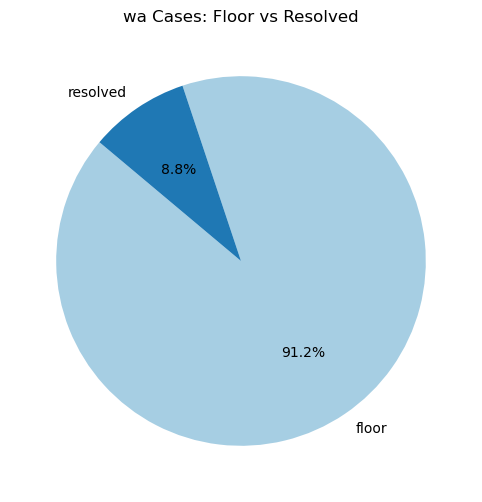

In [62]:
def create_resolved_pie_chart_for_wa(dataset):
    # Filter for 'wa' category
    wa_dataset = c3_dataset[c3_dataset['Last service'] == 'wa']
    
    # Assuming 'resolved' column indicates whether a case is 'floor' or 'resolved'
    resolved_counts = wa_dataset['resolved'].value_counts()
    
    # Generate pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(resolved_counts, labels=resolved_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('wa Cases: Floor vs Resolved')
    plt.show()


create_resolved_pie_chart_for_wa(c3_dataset)

# Difference for RS

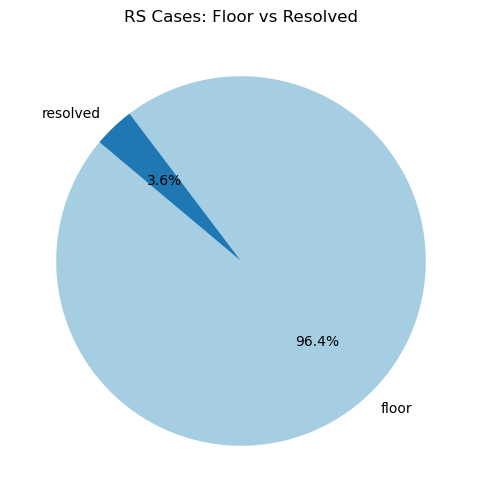

In [59]:
def create_resolved_pie_chart_for_rs(dataset):
    # Filter for 'RS' category
    rs_dataset = c3_dataset[c3_dataset['Last service'] == 'RS']
    
    # Assuming 'resolved' column indicates whether a case is 'floor' or 'resolved'
    resolved_counts = rs_dataset['resolved'].value_counts()
    
    # Generate pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(resolved_counts, labels=resolved_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('RS Cases: Floor vs Resolved')
    plt.show()


create_resolved_pie_chart_for_rs(c3_dataset)


# compare two columns calculate their prediction rate

In [63]:
import pandas as pd


# Compare 'Last service' and 'reason' columns for equality
c3_dataset['Prediction Correct'] = c3_dataset['Last service'] == c3_dataset['reason']

# This will result in a new column with True (prediction correct) or False (prediction incorrect)


In [64]:
# Calculate the accuracy as the mean of the 'Prediction Correct' column
accuracy = c3_dataset['Prediction Correct'].mean()
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 57.31%


# drop na

In [65]:
import pandas as pd


# Initialize a list to keep track of accuracies
accuracies = []

# Get unique services from 'Last service' column
unique_services = c3_dataset['Last service'].dropna().unique()

# Iterate through each service and calculate its accuracy
for service in unique_services:
    # Filter the dataset for rows where 'Last service' is the current service
    filtered_dataset = c3_dataset[c3_dataset['Last service'] == service]
    
    # Calculate the number of times this service matches the 'reason'
    match_count = (filtered_dataset['Last service'] == filtered_dataset['reason']).sum()
    
    # Calculate the total occurrences of this service in the 'Last service' column
    total_count = filtered_dataset.shape[0]
    
    # Calculate accuracy as percentage and add it to the list
    accuracy = (match_count / total_count) * 100 if total_count > 0 else 0  # Avoid division by zero
    accuracies.append({'Service': service, 'Accuracy': accuracy, 'Total Count': total_count})

# Convert accuracies to a DataFrame for better readability
accuracy_df = pd.DataFrame(accuracies)
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)  # Sort by accuracy in descending order
accuracy_df.reset_index(drop=True, inplace=True)
print(accuracy_df)


   Service    Accuracy  Total Count
0       iA  100.000000           80
1       ER  100.000000          107
2       iO  100.000000           18
3       IC   99.633079         7086
4       Pd   99.494382         7120
5       PT   99.484499       221920
6       eP   99.464525          747
7       FM   99.273784         2754
8       RC   99.091322         2201
9       eL   98.766194         1621
10      eR   98.449612          258
11      wa   98.104656        14562
12      AP   97.689930         6147
13      iR   97.608829         1631
14      RP   97.043568         1928
15      LC   96.986908        10388
16      CD   96.875000          480
17      CT   96.706545         7105
18      BL   96.648045          179
19      eB   96.296296           27
20      eA   95.906433          684
21      iM   94.594595          185
22      GA   94.429848         1903
23      LS   94.261455         6831
24      eS   90.000000           10
25      SR   89.429373         1069
26      CA   89.309878      

# drop na for floor only

In [98]:
import pandas as pd


# Initialize a list to keep track of accuracies
accuracies = []

# Get unique services from 'Last service' column
unique_services = c3_floor['Last service'].dropna().unique()

# Iterate through each service and calculate its accuracy
for service in unique_services:
    # Filter the dataset for rows where 'Last service' is the current service
    filtered_dataset = c3_floor[c3_floor['Last service'] == service]
    
    # Calculate the number of times this service matches the 'reason'
    match_count = (filtered_dataset['Last service'] == filtered_dataset['reason']).sum()
    
    # Calculate the total occurrences of this service in the 'Last service' column
    total_count = filtered_dataset.shape[0]
    
    # Calculate accuracy as percentage and add it to the list
    accuracy = (match_count / total_count) * 100 if total_count > 0 else 0  # Avoid division by zero
    accuracies.append({'Service': service, 'Accuracy': accuracy, 'Total Count': total_count})

# Convert accuracies to a DataFrame for better readability
accuracy_df_floor = pd.DataFrame(accuracies)
accuracy_df_floor.sort_values(by='Accuracy', ascending=False, inplace=True)  # Sort by accuracy in descending order
accuracy_df_floor.reset_index(drop=True, inplace=True)
print(accuracy_df_floor)


   Service    Accuracy  Total Count
0       iA  100.000000           53
1       eS  100.000000            6
2       FM   99.797735         2472
3       IC   99.773813         3979
4       Pd   99.689698         4834
5       wa   99.638717        13286
6       eP   99.580713          477
7       BL   99.346405          153
8       RC   99.341439         1974
9       eL   98.907104         1098
10      AP   98.573975         3927
11      PT   98.415337        18048
12      iR   98.177299         1207
13      CD   97.938144          388
14      eR   97.849462          186
15      RP   97.554348          368
16      CT   97.522346         6377
17      LC   96.918947         7822
18      eA   96.118721          438
19      GA   95.344828         1160
20      iM   94.047619           84
21      LS   93.640759         5378
22      eB   92.307692           13
23      SR   92.169657          613
24      CA   88.805970          402
25      VA   88.157895           76
26      WA   86.503067      

# Save as accuracy_report.csv file

In [66]:
# Assuming the script has been run successfully and 'accuracy_df' contains the desired data
# Now, let's write this DataFrame to a CSV file

# Define the file path
file_path = '/Users/yuxitian/Desktop/Datathon 03:2024/accuracy_df.csv'

# Write to CSV
accuracy_df.to_csv(file_path, index=False)  # We don't include the DataFrame index in the file

# Return the path for download
file_path


'/Users/yuxitian/Desktop/Datathon 03:2024/accuracy_df.csv'

# Save as accuracy_report.csv file for floor only

In [99]:
# Assuming the script has been run successfully and 'accuracy_df' contains the desired data
# Now, let's write this DataFrame to a CSV file

# Define the file path
file_path = '/Users/yuxitian/Desktop/Datathon 03:2024/accuracy_df_floor.csv'

# Write to CSV
accuracy_df_floor.to_csv(file_path, index=False)  # We don't include the DataFrame index in the file

# Return the path for download
file_path

'/Users/yuxitian/Desktop/Datathon 03:2024/accuracy_df_floor.csv'

# read the .scv file and sort by 'service'

In [94]:
import pandas as pd


accuracy_df = pd.read_csv(file_path)
accuracy_df

sorted_table = accuracy_df.sort_values(by='Service')
sorted_table


,Service,Accuracy,Total Count
30,AA,75.633058,58091
12,AP,97.689930,6147
39,AU,0.869025,1611
18,BL,96.648045,179
42,Ba,0.000000,2988
26,CA,89.309878,739
34,CB,59.228363,5754
16,CD,96.875000,480
17,CT,96.706545,7105
35,DP,54.579208,2424


# read the .scv file and sort by 'service' for floor

In [100]:
import pandas as pd


accuracy_df_floor = pd.read_csv(file_path)
accuracy_df_floor

sorted_table_floor = accuracy_df_floor.sort_values(by='Service')
sorted_table_floor


,Service,Accuracy,Total Count
29,AA,77.800062,12964
10,AP,98.573975,3927
37,AU,1.010101,693
7,BL,99.346405,153
41,Ba,0.000000,2600
24,CA,88.805970,402
34,CB,13.356164,876
13,CD,97.938144,388
16,CT,97.522346,6377
27,DP,84.568733,1484


In [97]:
# Filter the DataFrame for specific service values
filtered_df = accuracy_df[accuracy_df['Service'].isin(['RS', 'PP', 'PI', 'PT', 'wa'])]

# Sort the filtered DataFrame
sorted_table_floor = filtered_df.sort_values(by='Service')  
sorted_table_floor

,Service,Accuracy,Total Count
38,PI,3.458344,98978
27,PP,88.047027,766278
5,PT,99.484499,221920
40,RS,0.055936,128719
11,wa,98.104656,14562


# for floor only

In [101]:
# Filter the DataFrame for specific service values
filtered_df_floor = accuracy_df_floor[accuracy_df_floor['Service'].isin(['RS', 'PP', 'PI', 'PT', 'wa'])]

# Sort the filtered DataFrame 
sorted_table_floor_floor = filtered_df_floor.sort_values(by='Service')  
sorted_table_floor_floor

,Service,Accuracy,Total Count
35,PI,4.150883,18743
31,PP,67.602407,48019
11,PT,98.415337,18048
38,RS,0.058014,124109
5,wa,99.638717,13286


In [106]:
# Filter the DataFrame for specific service values
filtered_df_floor = accuracy_df_floor[accuracy_df_floor['Service'].isin(['RS', 'PP', 'PI', 'PT', 'wa'])]

# Group by 'Service', sum up 'Total_Accounts', and calculate average 'Accuracy' for each service
# Then sort the results by 'Total_Accounts' in descending order
service_aggregates = filtered_df_floor.groupby('Service').agg({
    'Total Count': 'sum',  
    'Accuracy': 'mean'       
}).sort_values(by='Total Count', ascending=False)

# Convert the Series to a DataFrame for better visualization in a table format
service_aggregates_df = service_aggregates.reset_index()

# Display the table
service_aggregates_df


,Service,Total Count,Accuracy
0,RS,124109,0.058014
1,PP,48019,67.602407
2,PI,18743,4.150883
3,PT,18048,98.415337
4,wa,13286,99.638717


# Drop the last row and save to .csv file

In [68]:
import pandas as pd


accuracy_df = pd.read_csv(file_path)

# Sort the table by 'Service'
sorted_table = accuracy_df.sort_values(by='Service')

# Drop the last row
final_table = sorted_table[:-1]

# Save the modified DataFrame to a new CSV file
output_file_path = '/Users/yuxitian/Desktop/Datathon 03:2024/modified_accuracy_report.csv'
final_table.to_csv(output_file_path, index=False)


# Run chi-squre test

In [ ]:
c3_dataset['account_balance_change'] = c3_dataset['account_balance_18_march'] - c3_dataset['account_balance_13_march']
c3_dataset['no_of_accounts_with_syf_change'] = c3_dataset['no_of_accounts_with_syf_18_march'] - c3_dataset['no_of_accounts_with_syf_13_march']


#Deal with Delinquency_history_change
# Drop rows with NaN values in the original delinquency history columns
c3_dataset = c3_dataset.dropna(subset=['delinquency_history_13_march', 'delinquency_history_18_march'])

def extract_elements(s):
    if s == '[]':
        return [0, 0]
    else:
        elements = s.strip('[]').split(',')
        # Check if there are exactly two elements
        if len(elements) == 2:
            return [int(elements[0]), int(elements[1])]
        else:
            return [0, 0]  # Return [0, 0] if there are not exactly two elements

# Apply the function to extract elements
c3_dataset[['delinquency_history_past_due_13_march', 'delinquency_history_current_due_13_march']] = c3_dataset['delinquency_history_13_march'].apply(lambda x: pd.Series(extract_elements(x)))
c3_dataset[['delinquency_history_past_due_18_march', 'delinquency_history_current_due_18_march']] = c3_dataset['delinquency_history_18_march'].apply(lambda x: pd.Series(extract_elements(x)))

# Calculate the total past due for each date and the change
c3_dataset['total_past_due_13_march'] = c3_dataset['delinquency_history_past_due_13_march'] + c3_dataset['delinquency_history_current_due_13_march']
c3_dataset['total_past_due_18_march'] = c3_dataset['delinquency_history_past_due_18_march'] + c3_dataset['delinquency_history_current_due_18_march']
c3_dataset['delinquency_history_change'] = c3_dataset['total_past_due_18_march'] - c3_dataset['total_past_due_13_march']



import statsmodels.api as sm

# Drop rows with NaN values in relevant columns
cleaned_dataset = c3_dataset.dropna(subset=['account_balance_change', 'no_of_accounts_with_syf_change','delinquency_history_change', 'true_resolved'])
print("Number of rows in cleaned_dataset:", len(cleaned_dataset))

#print("Missing values in relevant columns:")
#print(c3_dataset[['account_balance_change', 'no_of_accounts_with_syf_change', 'delinquency_history_change', 'true_resolved']].isna().sum())


# Prepare the data
X = cleaned_dataset[['account_balance_change', 'no_of_accounts_with_syf_change']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = cleaned_dataset['true_resolved']

#from statsmodels.stats.outliers_influence import variance_inflation_factor

#found multicollinearity: then check which one variable to exclude:
# Calculate VIF for each independent variable
#vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns
#vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print(vif_data)

#print(cleaned_dataset['delinquency_history_change'].unique())
#print(X['delinquency_history_change'].isna().sum())



# Fit the logistic regression model 
model = sm.Logit(y, X).fit()
print(model.summary())

X = cleaned_dataset[['account_balance_change', 'no_of_accounts_with_syf_change']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = cleaned_dataset['true_resolved']

In [ ]:
column_name = ['account_open_date', 'account_status', 'card_activation_status', 'eservice_ind', 'ebill_enrolled_status', 'auto_pay_enrolled_status']
for name in column_name:
    a = name + '_13_march'
    b = name + '_18_march'
    c = name + '_changed'
    c3_dataset[c] = c3_dataset[a] == c3_dataset[b]
    
from scipy.stats import chi2_contingency

for name in column_name:
    c = name + '_changed'
    # Drop rows with NaN values in the relevant columns
    cleaned_dataset = c3_dataset.dropna(subset=[c, 'true_resolved'])
    # Create a contingency table
    contingency_table = pd.crosstab(cleaned_dataset[c], cleaned_dataset['true_resolved'])
    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test for {c}: chi2 = {chi2}, p-value = {p}')

# relationship between [c3_floor] the 'account_balance_13_march' and 'Last service' columns

/var/folders/2k/n4_my9kx7t9_w_13dxt5vfvc0000gn/T/ipykernel_19743/2359547064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c3_floor['account_balance_13_march'] = pd.to_numeric(c3_floor['account_balance_13_march'], errors='coerce')
/var/folders/2k/n4_my9kx7t9_w_13dxt5vfvc0000gn/T/ipykernel_19743/2359547064.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c3_floor['Last service'] = c3_floor['Last service'].astype(str)


                     mean    median          std   count
Last service                                            
AA            1018.559237   164.935  2073.950338   11086
AP             879.210557   149.230  1771.731032    3396
AU             401.202358     0.000  1190.953333     653
BL            2093.800500  1014.145  3110.416186     140
Ba            1568.829208   926.265  1830.102650    2500
CA             865.248545    65.795  2593.101464     378
CB             139.705846   -14.230   787.067730     804
CD            2230.410833  1540.435  2382.941484     372
CT            1052.283863   280.680  1769.892874    5887
DP            1602.288207   598.190  2856.130691    1333
DR            1463.220601   503.860  2595.031185    1764
FI            1369.713354   591.190  2104.212239    1637
FM            1428.051662   574.165  2154.612907    2286
GA            1595.809285   616.410  2372.897833     997
HI            1007.404855   283.120  1734.447837    4698
IC            1253.138536   479

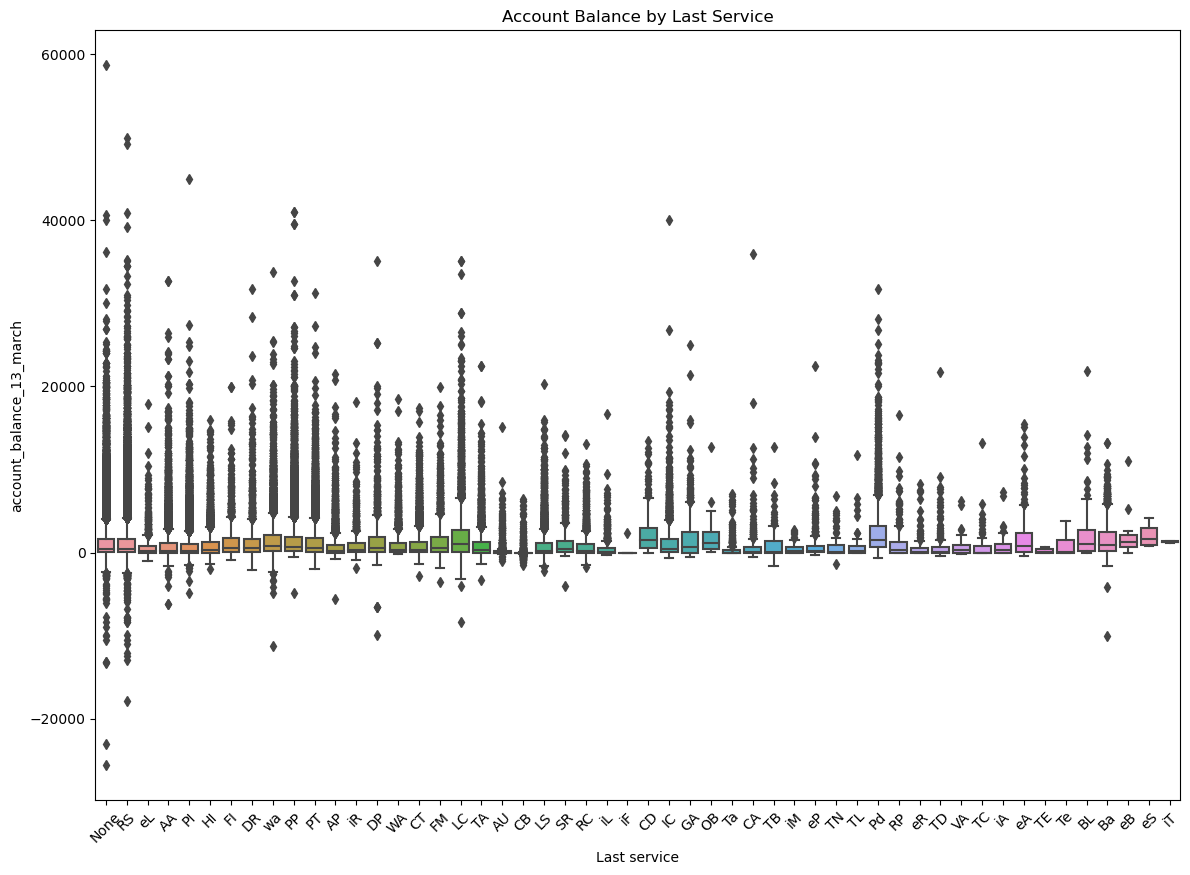

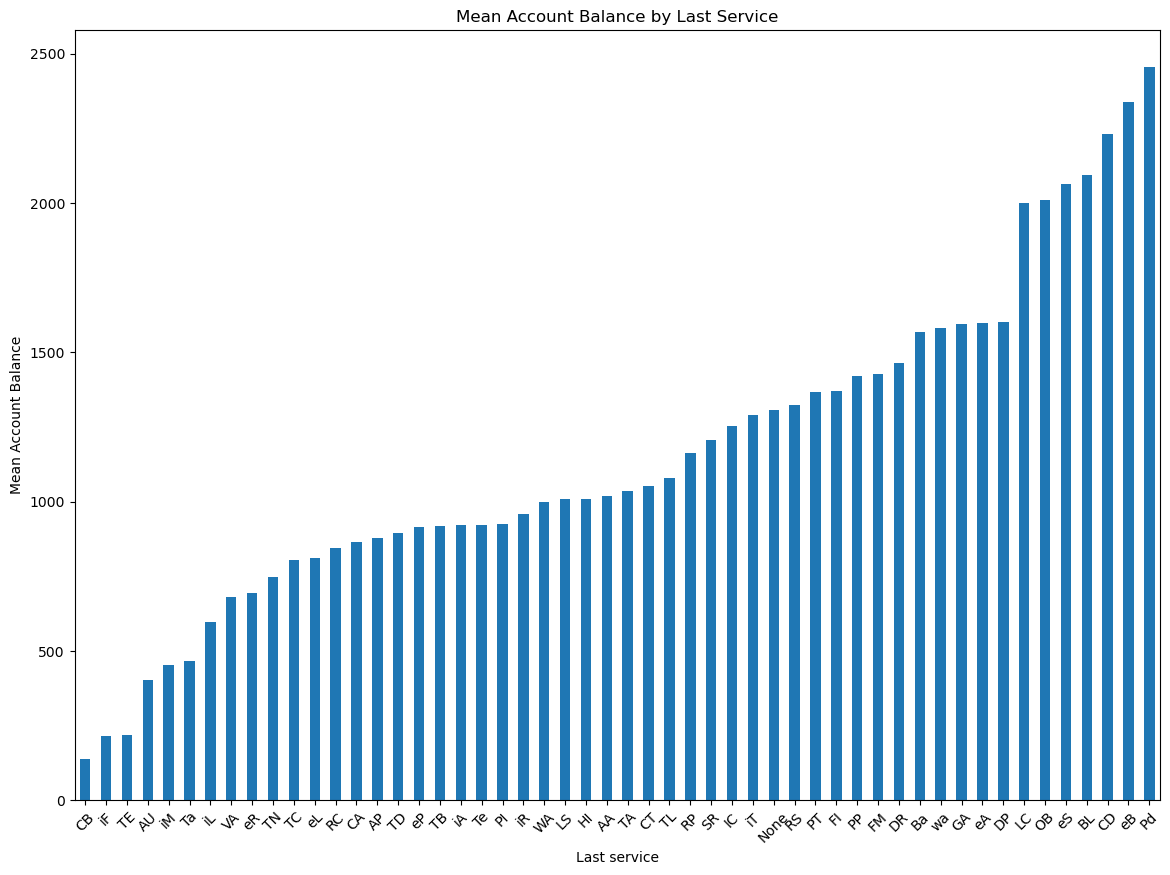

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'account_balance_13_march' to numeric if it's not already
c3_floor['account_balance_13_march'] = pd.to_numeric(c3_floor['account_balance_13_march'], errors='coerce')

# Ensure 'Last service' is a string to prevent any issues during grouping
c3_floor['Last service'] = c3_floor['Last service'].astype(str)

# Group by 'Last service' and get summary statistics for 'account_balance_13_march'
grouped_data = c3_floor.groupby('Last service')['account_balance_13_march'].agg(['mean', 'median', 'std', 'count'])
print(grouped_data)

# Visualization
# Box plot to see the distribution of 'account_balance_13_march' for each 'Last service'
plt.figure(figsize=(14, 10))
sns.boxplot(x='Last service', y='account_balance_13_march', data=c3_floor)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('Account Balance by Last Service')
plt.show()

# Bar plot for mean account balance by Last service
plt.figure(figsize=(14, 10))
grouped_data['mean'].sort_values().plot(kind='bar')  # Sorting values for better visualization
plt.title('Mean Account Balance by Last Service')
plt.ylabel('Mean Account Balance')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


# Statistical Summary by Service Category

In [77]:
# Generate statistical summaries for each 'Last service' category
grouped_stats = c3_floor.groupby('Last service')['account_balance_13_march'].describe()


mean_balances = c3_floor.groupby('Last service')['account_balance_13_march'].mean()
median_balances = c3_floor.groupby('Last service')['account_balance_13_march'].median()

print(grouped_stats)


                 count         mean          std       min        25%  \
Last service                                                            
AA             11086.0  1018.559237  2073.950338  -6127.91     0.0000   
AP              3396.0   879.210557  1771.731032  -5539.54     0.0000   
AU               653.0   401.202358  1190.953333  -1052.79     0.0000   
BL               140.0  2093.800500  3110.416186      0.00   157.5825   
Ba              2500.0  1568.829208  1830.102650 -10000.00   169.9150   
CA               378.0   865.248545  2593.101464   -491.70     0.0000   
CB               804.0   139.705846   787.067730  -1473.19   -54.5900   
CD               372.0  2230.410833  2382.941484      0.00   550.0150   
CT              5887.0  1052.283863  1769.892874  -2800.00    32.0000   
DP              1333.0  1602.288207  2856.130691  -9859.96   111.8000   
DR              1764.0  1463.220601  2595.031185  -2124.38    97.5625   
FI              1637.0  1369.713354  2104.212239   

# Predictive Modeling

In [78]:
# Check for NaN values in 'account_balance_13_march'
nan_count = c3_floor['account_balance_13_march'].isna().sum()
print(f"Number of NaN values in 'account_balance_13_march': {nan_count}")


Number of NaN values in 'account_balance_13_march': 28844


In [79]:
# Remove rows where 'account_balance_13_march' is NaN
c3_dataset_cleaned = c3_floor.dropna(subset=['account_balance_13_march'])

# Verify the removal
nan_count_after = c3_dataset_cleaned['account_balance_13_march'].isna().sum()
print(f"Number of NaN values in 'account_balance_13_march' after removal: {nan_count_after}")


Number of NaN values in 'account_balance_13_march' after removal: 0


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Assuming 'Last service' is the only feature for simplicity
X = c3_dataset_cleaned[['Last service']]
y = c3_dataset_cleaned['account_balance_13_march']

# Encoding categorical features and imputing any remaining missing values
categorical_features = ['Last service']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor(n_estimators=100, random_state=0))])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the model
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
print(f"Model RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")


Model RMSE: 2198.3367270738145


In [81]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

print(f"Cross-validated RMSE scores: {-scores}")
print(f"Average RMSE: {-scores.mean()}")


Cross-validated RMSE scores: [1848.04143051 1901.99043649 2311.61086545 2360.53392033 2415.59051103]
Average RMSE: 2167.5534327611967


# Cluster Analysis

## Adjusted Preprocessing Steps

In [82]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming 'Last service' is the primary feature for clustering
X = c3_floor[['Last service']]  # Adjust if including other features


categorical_features = ['Last service']  

# Create transformers for preprocessing
# For categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for categorical data only (as an example)
preprocessor = ColumnTransformer(
    transformers=[
      
        ('cat', categorical_transformer, categorical_features)])

# Preprocessing
X_preprocessed = preprocessor.fit_transform(X)


# Run K-Means Clustering

In [119]:
from sklearn.cluster import KMeans


k = 10

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_preprocessed)

# Predict the cluster for each data point
clusters = kmeans.predict(X_preprocessed)

# Add the cluster assignments back to the original DataFrame
c3_floor['Cluster'] = clusters


/Users/yuxitian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/2k/n4_my9kx7t9_w_13dxt5vfvc0000gn/T/ipykernel_19743/3611606446.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c3_floor['Cluster'] = clusters


# Analyze the Clusters

In [120]:
# Average account balance by cluster
average_balance_by_cluster = c3_floor.groupby('Cluster')['account_balance_13_march'].mean()
print("Average Account Balance by Cluster:")
print(average_balance_by_cluster)

# Count of 'Last service' categories by cluster
service_distribution_by_cluster = pd.crosstab(c3_floor['Cluster'], c3_floor['Last service'])
print("\nDistribution of 'Last Service' by Cluster:")
print(service_distribution_by_cluster)

# Cluster sizes
cluster_sizes = c3_floor['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)


Average Account Balance by Cluster:
Cluster
0    1234.749382
1    1324.854122
2    1307.556309
3    1421.370595
4     923.681035
5    1365.684888
6    1582.321274
7    2000.167044
8    1052.283863
9    1018.559237
Name: account_balance_13_march, dtype: float64

Distribution of 'Last Service' by Cluster:
Last service     AA    AP   AU   BL    Ba   CA   CB   CD    CT    DP  ...  \
Cluster                                                               ...   
0                 0  3927  693  153  2600  402  876  388     0  1484  ...   
1                 0     0    0    0     0    0    0    0     0     0  ...   
2                 0     0    0    0     0    0    0    0     0     0  ...   
3                 0     0    0    0     0    0    0    0     0     0  ...   
4                 0     0    0    0     0    0    0    0     0     0  ...   
5                 0     0    0    0     0    0    0    0     0     0  ...   
6                 0     0    0    0     0    0    0    0     0     0  ...   
7 

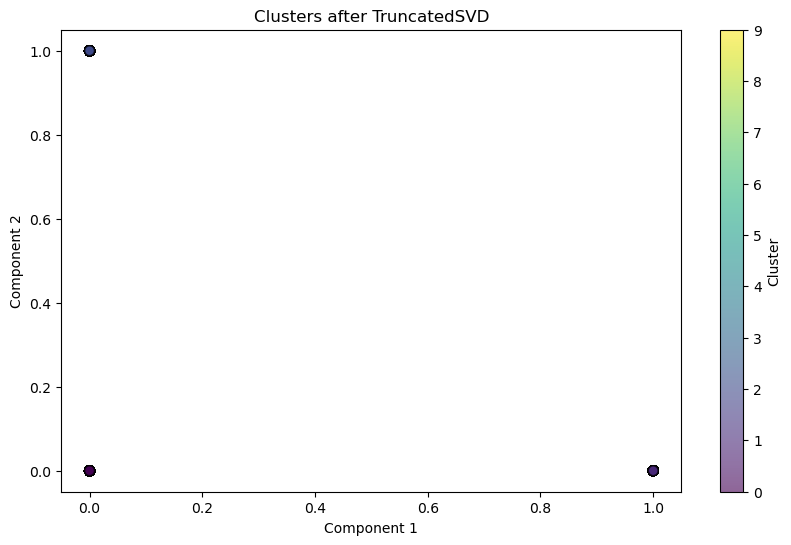

In [121]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Reduce dimensions with TruncatedSVD instead of PCA
svd = TruncatedSVD(n_components=2, random_state=0)
X_svd = svd.fit_transform(X_preprocessed)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Clusters after TruncatedSVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()


# top 5

In [122]:
# Average account balance by cluster
average_balance_by_cluster = c3_floor.groupby('Cluster')['account_balance_13_march'].mean().sort_values(ascending=False)
print("Top Five Clusters with Highest Average Account Balance:")
print(average_balance_by_cluster.head(10))


Top Five Clusters with Highest Average Account Balance:
Cluster
7    2000.167044
6    1582.321274
3    1421.370595
5    1365.684888
1    1324.854122
2    1307.556309
0    1234.749382
8    1052.283863
9    1018.559237
4     923.681035
Name: account_balance_13_march, dtype: float64


In [123]:
# Most common 'Last service' in each cluster
most_common_services = c3_floor.groupby('Cluster')['Last service'].agg(lambda x: x.value_counts().index[0])
print("Most Common 'Last Service' in Each Cluster:")
print(most_common_services.head(10))


Most Common 'Last Service' in Each Cluster:
Cluster
0      HI
1      RS
2    None
3      PP
4      PI
5      PT
6      wa
7      LC
8      CT
9      AA
Name: Last service, dtype: object


In [124]:
# Cluster sizes
cluster_sizes = c3_floor['Cluster'].value_counts()
print("Top Five Largest Clusters:")
print(cluster_sizes.head(10))


Top Five Largest Clusters:
Cluster
1    124109
2     60409
0     52706
3     48019
4     18743
5     18048
6     13286
9     12964
7      7822
8      6377
Name: count, dtype: int64


In [125]:
# Get the IDs of the top five largest clusters
top_clusters = cluster_sizes.head(10).index

# Filter dataset for top clusters and calculate distribution
top_clusters_distribution = pd.crosstab(c3_floor[c3_floor['Cluster'].isin(top_clusters)]['Cluster'], 
                                        c3_floor['Last service'])

print("Distribution of 'Last Service' in Top Five Largest Clusters:")
print(top_clusters_distribution)


Distribution of 'Last Service' in Top Five Largest Clusters:
Last service     AA    AP   AU   BL    Ba   CA   CB   CD    CT    DP  ...  \
Cluster                                                               ...   
0                 0  3927  693  153  2600  402  876  388     0  1484  ...   
1                 0     0    0    0     0    0    0    0     0     0  ...   
2                 0     0    0    0     0    0    0    0     0     0  ...   
3                 0     0    0    0     0    0    0    0     0     0  ...   
4                 0     0    0    0     0    0    0    0     0     0  ...   
5                 0     0    0    0     0    0    0    0     0     0  ...   
6                 0     0    0    0     0    0    0    0     0     0  ...   
7                 0     0    0    0     0    0    0    0     0     0  ...   
8                 0     0    0    0     0    0    0    0  6377     0  ...   
9             12964     0    0    0     0    0    0    0     0     0  ...   

Last service  

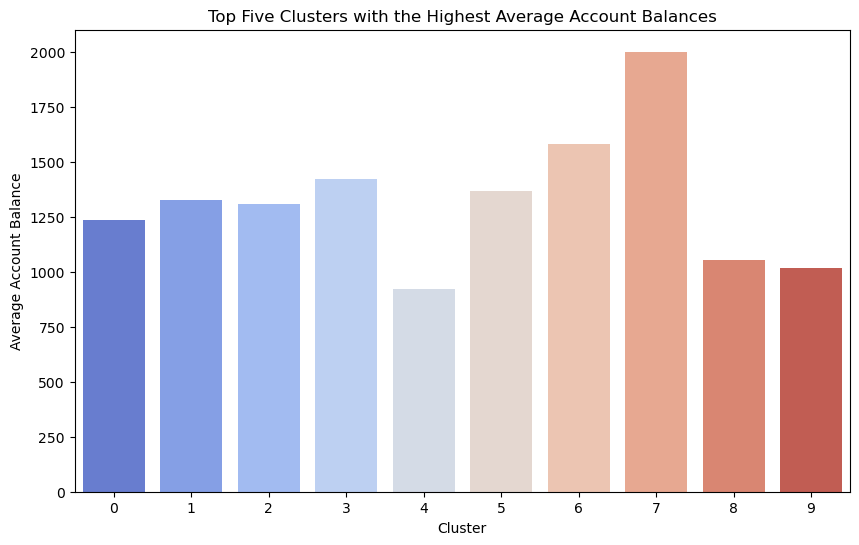

In [126]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Average account balance by cluster sorted and top 10
top_avg_balances = c3_floor.groupby('Cluster')['account_balance_13_march'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_avg_balances.index, y=top_avg_balances.values, palette='coolwarm')
plt.title('Top Five Clusters with the Highest Average Account Balances')
plt.xlabel('Cluster')
plt.ylabel('Average Account Balance')
plt.show()